In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

#Task 1: Conditional Probabilities
You know the University of Bremen has 18,335 students, of which 6,571 are in natural sciences and engineering (see https://www.uni-bremen.de/en/university/profile/facts-figures ). Three-quarters of your friends in the natural sciences like mate (a beverage) from your personal experience.
You are curious if you can determine how likely someone studies in this field, given they like mate. Therefore, you conduct a quick experiment in the mensa and ask at random tables the field and how much they like mate.

The following matrix describes your data. The first column describes if the person studies natural sciences (or not) and the second how much they like mate (scale from -2 to 2, higher=likes better, neutral is not allowed).

In [ ]:
questionaire_mate = np.array([[True, 1], [False, -1], [False, 1], [False, -1], [True, 1], [False, 1], [False, -2], [False, -1]])
questionaire_mate

array([[ 1,  1],
       [ 0, -1],
       [ 0,  1],
       [ 0, -1],
       [ 1,  1],
       [ 0,  1],
       [ 0, -2],
       [ 0, -1]])

Given a person likes mate, how likely are they to study in the natural sciences?

$$
\begin{aligned}
P(A|B) &= \frac{ P(A) \cdot P(B|A)}{P(B)} \\ \\

P(A|B) &= \frac{ P(A) \cdot P(B|A)}{P(A) \cdot P(B|A) + P(\neg A) \cdot P(B|\neg A)}
\end{aligned}
$$


In [ ]:
######## SOLUTION 1 (not that good) ##########

# This solution uses bayes theorem to solve the problem.
# Only the survey is taken into account, and no other information,
# which means it is not very accurate.

survey_size = len(questionaire_mate)

# Data where the students are STEM students
stem_in_survey = np.where(questionaire_mate[:,0] == 1)
# Data where the students are non-STEM students
others_in_survey = np.where(questionaire_mate[:,0] == 0)

stem_count = np.size(stem_in_survey)
others_count = np.size(others_in_survey)

# Ratio of stem students in survey -> P(A)
stem_ratio = stem_count / survey_size
# Ratio of other students in survey -> P(not A)
others_ratio = others_count / survey_size

def normalized(x, min=-2, max=2):
    return (x-min)/(max-min)

# Normalised averge score for STEM students -> P(B | A)
avg_stem_mate = normalized(sum(questionaire_mate[stem_in_survey])[1] / stem_count)
# Normmalised averge score for other students -> P(B | not A)
avg_others_mate = normalized(sum(questionaire_mate[others_in_survey])[1] / others_count)

# P(A|B) = ( P(A)*P(B|A) ) / ( P(A)*P(B|A) + P(not A)*P(B|not A) )
result = (stem_ratio * avg_stem_mate) / (stem_ratio * avg_stem_mate + others_ratio * avg_others_mate)
result


0.4

In [ ]:
######## SOLUTION 2 (maybe better) ##########

# This solution also uses bayes theorem.
# We use the given data for STEM students,
# and the survey data for non-STEM students.

student_count = 18335
stem_students = 6571
others = student_count - stem_students

# Ratio of STEM students in uni Bremen -> P(A)
stem_ratio = stem_students / student_count
# Ratio of non-STEM students in uni Bremen -> P(not A)
others_ratio = others / student_count

# Data where the students are other students
others_in_survey = np.where(questionaire_mate[:,0] == 0)
others_count = np.size(others_in_survey)

def normalized(x, min=-2, max=2):
    return (x-min)/(max-min)

# The percentage of STEM students that like mate -> P(B | A)
avg_stem_mate = 0.75
# Normmalised averge score for other students -> P(B | not A)
avg_others_mate = normalized(sum(questionaire_mate[others_in_survey])[1] / others_count)

#P(A|B) = ( P(A)*P(B|A) ) / ( P(A)*P(B|A) + P(not A)*P(B|not A) )
result = (stem_ratio * avg_stem_mate) / (stem_ratio * avg_stem_mate + others_ratio * avg_others_mate)
result

0.5276640167028025

#Task 2: Maximum Likelihood Estimation
A Gaussian normal distribution can be fitted by applying the Maximum Likelihood Estimation to determine the best parameters for explaining a given dataset. This is equivalent to calculating the mean (and variance) on the dataset directly; why?

The Gaussian normal distribution is given as follows:

$$
N(\mu,\sigma) = \frac{1}{\sigma \sqrt{2\pi}}
e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}
$$

Hint: The partial derivative is easier to compute when using a log likelihood.

#### Solution:

The parameters of the Gaussian normal distribution:

- $\mu$ = determines the location of the normal distribution's **mean**
- $\sigma$ = determines the normal distribution's curve width **(standard deviation)**

Given a data point $x$, use the likelihood of normal distribution to determine the optimal values for $\mu$ and $\sigma$

$$
L(\mu,\sigma | x) = \frac{1}{\sigma \sqrt{2\pi}}
e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}
$$


In [ ]:
def gaussian_likelihood(mu, sigma, x):
    return 1 / (sigma * math.sqrt(2 * math.pi)) * (math.e ** (-1/2 * ((x - mu) / sigma)**2))

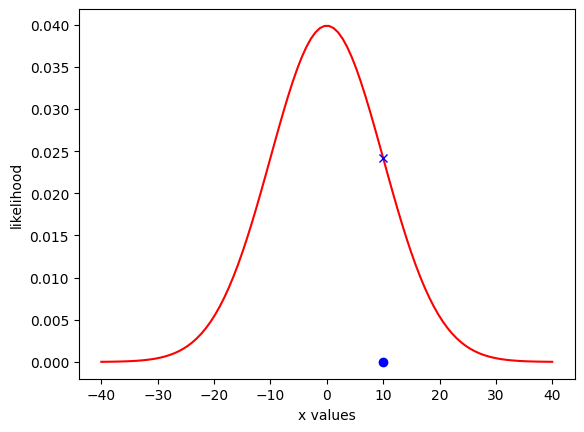

gaussian likelihood: 0.02419707245191434


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

x = np.linspace(-40, 40, 100)

# pick a data point x_i, adjust mu and sigma accordingly
# you can mess around with these values and see what happens

mu = 0
sigma = 10
x_i = 10

plt.xlabel("x values")
plt.ylabel("likelihood")

plt.plot(x, gaussian_likelihood(mu, sigma, x), 'r')
plt.plot(x_i, 0, 'bo') # datapoint
plt.plot(x_i, gaussian_likelihood(mu, sigma, x_i), 'bx') # gaussian likelihood
plt.show()

print(f"gaussian likelihood: {gaussian_likelihood(mu, sigma, x_i)}")

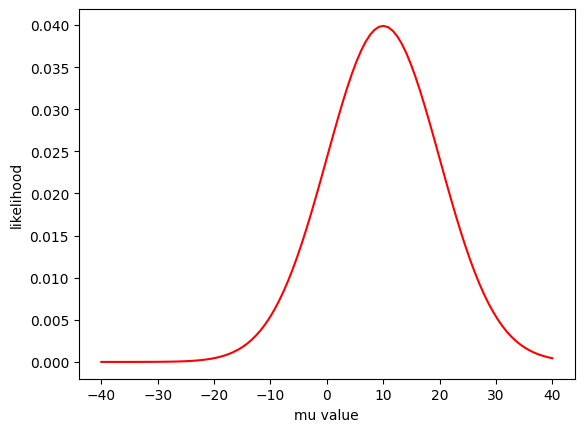

In [ ]:
# plug in different values of mu, to see which one gives the maxlikelihood

mu = np.linspace(-40, 40, 100)
sigma = 10
x_i = 10

plt.xlabel("mu value")
plt.ylabel("likelihood")

plt.plot(mu, gaussian_likelihood(mu, sigma, x_i), 'r')
plt.show()


- to find best mu, treat sigma as a constant, find where slope is 0
- to find best sigma, treat mu as a constant, find where slope is 0

With multiple datapoints:

The likelihood of the distribution, given $n$ datapoints, is the product of the likelihood functions for all $n$ datapoints.


$$
L(\mu,\sigma | x_1, ..., x_n) = \frac{1}{\sigma \sqrt{2\pi}}
e^{-\frac{1}{2}(\frac{x_1-\mu}{\sigma})^2} \times ... \times \frac{1}{\sigma \sqrt{2\pi}}
e^{-\frac{1}{2}(\frac{x_n-\mu}{\sigma})^2}
$$

Maximum likelihood estimates for $\mu$ and $\sigma$:

We need to take a derivative of the function $L(\mu,\sigma | x_1, ..., x_n)$
- with respect to $\mu$ (treat $\sigma$ as a constant)
- with respect to $\sigma$ (treat $\mu$ as a constant).

Find the optimal value where the derivative = 0

If we take the log of the likelihood function, taking the derivative will be easier (the likelihood function and the log of the likelihood function both peak at the same values for $\mu$ and $\sigma$, so the derivative does not change).

Take the log of the likelihood function:


$$
\begin{aligned}
ln[L(\mu,\sigma | x_1, ..., x_n)] &= ln(\frac{1}{\sigma \sqrt{2\pi}}
e^{-\frac{1}{2}(\frac{x_1-\mu}{\sigma})^2} \times ... \times \frac{1}{\sigma \sqrt{2\pi}}
e^{-\frac{1}{2}(\frac{x_n-\mu}{\sigma})^2}) \\

&= ln(\frac{1}{\sigma \sqrt{2\pi}}
e^{-\frac{1}{2}(\frac{x_1-\mu}{\sigma})^2}) + ... + ln(\times \frac{1}{\sigma \sqrt{2\pi}}
e^{-\frac{1}{2}(\frac{x_n-\mu}{\sigma})^2}) \\

&= -\frac{1}{2} ln(2\pi) - ln(\sigma) - \frac{(x_1 - \mu)^2}{2\sigma^2} - ... -\frac{1}{2} ln(2\pi) - ln(\sigma) - \frac{(x_n - \mu)^2}{2\sigma^2} \\

&= -\frac{n}{2} ln(2\pi) - nln(\sigma) - \frac{(x_1 - \mu)^2}{2\sigma^2} - ... - \frac{(x_n - \mu)^2}{2\sigma^2}
\end{aligned}
$$



Take the derivative of log(likelihood) with respect to $\mu$:

$$
\frac{\partial}{\partial \mu} ln [ L(\mu,\sigma | x_1, ..., x_n) ] = \frac{1}{\sigma^2}[(x_1 + ... + x_n) - n \mu]
$$


Take the derivative of log(likelihood) with respect to $\sigma$:

$$
\frac{\partial}{\partial \sigma} ln [ L(\mu,\sigma | x_1, ..., x_n) ] = - \frac{n}{\sigma} + \frac{1}{\sigma^3} [(x_1 - \mu)^2 + ... + (x_n - \mu)^2 ]
$$

Find the maximum likelihood estimate for $\mu$:

- Set the derivative with respect to $\mu$ to 0, and solve for $\mu$

$$
\begin{aligned}
0 &= \frac{1}{\sigma^2}[(x_1 + ... + x_n) - n \mu] \\
0 &= (x_1 + ... + x_n) - n \mu \\
\mu &= \frac{(x_1 + ... + x_n)}{n}
\end{aligned}
$$

- The maximum likelihood estimate for $\mu$ is the **mean** of the dataset.


Find the maximum likelihood estimate for $\sigma$:

- Set the derivative with respect to $\sigma$ to 0, and solve for $\sigma$

$$
\begin{aligned}
0 &= - \frac{n}{\sigma} + \frac{1}{\sigma^3} [(x_1 - \mu)^2 + ... + (x_n - \mu)^2 ] \\
\sigma &= \sqrt{\frac{(x_1 - \mu)^2 + ... + (x_n - \mu)^2}{n}}
\end{aligned}
$$

- The maximum likelihood estimate for $\sigma$ is the **standard deviation** of the dataset.

#Task 3: Kullback-Leibler Divergence

$$D_{KL}(P|Q) = \sum_x P(x)log(\frac{P(x)}{Q(x)})$$

a) Calculate the KL divergence for two discrete distributions $P$ and $Q$ over events $A,B,C$.
Calculate $D_{KL}(P|Q)$ and $D_{KL}(Q|P)$ and compare!

| Distribution | A | B | C |
| --- | --- | --- | --- |
| P | 0.5 | 0.3 | 0.2 |
| Q | 0.4 | 0.2 | 0.4 |

In [ ]:
p = [0.5,0.3,0.2]
q = [0.4,0.2,0.4]
# implement or calculate

def kl_divergence(p, q):
	return sum(p[i] * math.log(p[i]/q[i]) for i in range(len(p)))

print(f"DKL(P|Q) = {kl_divergence(p, q)}")
print(f"DKL(Q|P) = {kl_divergence(q, p)}")

### The leading P(x) ###
# We want to prioritize the popular x values in our distribution.
# We downweight the changes of smaller x values, upweight the larger ones (probabilistic weighting).

DKL(P|Q) = 0.0945818719775651
DKL(Q|P) = 0.10690843007666134


b) For this task, assume for simplicity that $P$ and $Q$ are discrete distributions over two events $A,B$.

i) For a given $P$, what $Q_{min}$ minimizes $D_{KL}(P|Q)$? Justify your answer!

ii) For a given P, show that there is no upper bound for $D_{KL}(P|Q)$.

In [ ]:
# i)
# For a given P, Q = P minimizes DKL(P|K)
p=[0.3, 0.2]
q=[0.3, 0.2]
kl_divergence(p,q)

0.0

In [ ]:
#ii)
# as P(x)/Q(x) increases, log(P(x)/Q(x)) approaches infinity
p=[0.3, 0.2]
q=[0.000000000000000003, 0.2]
print(kl_divergence(p,q))

11.743183974269632


# Task 4: Feature Compression

Assume you want to perform classification with two classes, $A$ and $B$ in the feature space ${\rm I\!R}^{2n}$. We can assume that the two classes follow a normal distribution, with $\mu_A = (\mu_1, \mu_2)$ and $\mu_B = (\mu_1, \mu_3)$, with $\mu_1, \mu_2, \mu_3 \in {\rm I\!R}^n$. $\Sigma$ is identical for both distributions, see below ($\sigma \in [0,1]$, $\alpha \approx 1$). You perform a Principal Component Analysis (PCA) for feature space transformation.

$$\sum =
\left(
  \begin{array}{ccc}
  \begin{array}{cc}
\sigma & \alpha\\
\alpha & \sigma
\end{array} & \dots & 0  \\
  \vdots & \ddots & \vdots  \\
  0 & \dots & \begin{array}{cc}
\sigma & \alpha\\
\alpha & \sigma
\end{array}
\end{array} \right) \in \mathbb{R}^{2n \times 2n} $$

a) Without calculating the result, make a prediction about how the sorted sequence of Eigenvalues will look like! You do not need to give exact numbers, but sketch the graph of Eigenvalues by Eigenvector index. How many components do you anticipate to keep to retain most of the variance in the data?

Hint: you may choose to implement and plot an example for this task.
If so, np.random.multivariate_normal and sklearn.decomposition might come in handy.

<ipython-input-11-f579e4ce5074>:26: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data_A = np.random.multivariate_normal(mu_A, Sigma, size=100)
<ipython-input-11-f579e4ce5074>:27: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data_B = np.random.multivariate_normal(mu_B, Sigma, size=100)


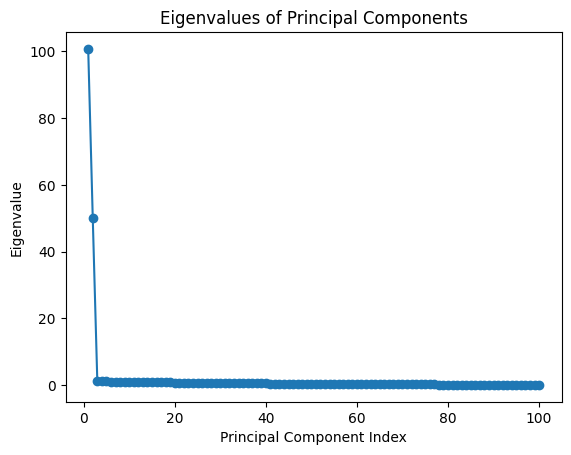

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Parameters
n = 50  # Dimension for each part of the mean vectors
sigma = 0.5
alpha = 0.95  # Slight correlation between features

# Mean vectors for classes A and B
mu1 = np.zeros(n)
mu2 = np.ones(n)
mu3 = -np.ones(n)

# Construct full mean vectors for A and B in R^(2n)
mu_A = np.concatenate((mu1, mu2))
mu_B = np.concatenate((mu1, mu3))

# Construct covariance matrix Sigma in R^(2n x 2n)
Sigma_block = np.full((n, n), alpha) + (sigma - alpha) * np.eye(n)
Sigma = np.block([[Sigma_block, np.zeros((n, n))],
                  [np.zeros((n, n)), Sigma_block]])

# Generate data
np.random.seed(0)
data_A = np.random.multivariate_normal(mu_A, Sigma, size=100)
data_B = np.random.multivariate_normal(mu_B, Sigma, size=100)
data = np.vstack((data_A, data_B))

# Perform PCA
pca = PCA()
pca.fit(data)
eigenvalues = pca.explained_variance_

# Plot the eigenvalues
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of Principal Components')
plt.show()